## Data Pre-Processing.

In [69]:
# Importing libraries to be used.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [70]:
df = pd.read_csv('diabetes_data_upload.csv')

In [71]:
# Changing Postive to 1 and Negative to  in the 'Class' column
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [72]:
# Separating Target feature
X = df.drop(['class'], axis=1)
y = df['class']

In [73]:
# Storing Features
objectList = X.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [74]:
#Label Encoding for object to numeric conversion and hence the data types will change to int64
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


In [75]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [76]:
# Correlation between the features.
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

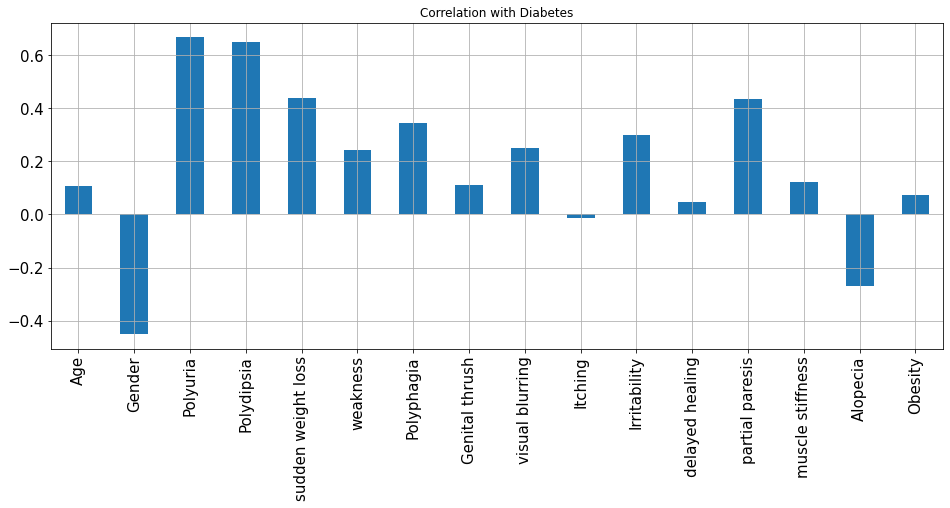

In [77]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

## Train and Test Split.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 12345)

In [79]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1    256
0    160
Name: class, dtype: int64
Distribution of target variable in test set
1    64
0    40
Name: class, dtype: int64


In [80]:
# Data Normalization.
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [81]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
515,0.310811,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
169,0.513514,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0
122,0.324324,1,0,1,0,1,1,0,0,1,1,1,1,1,0,1
278,0.297297,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188,0.729730,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0


In [82]:
# Feature Selection.
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [83]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [84]:
X_FS = X[['Polyuria', 'Polydipsia','Age', 'Gender','partial paresis','sudden weight loss','Irritability', 'delayed healing','Alopecia','Itching']]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_FS, y, test_size = 0.2, stratify=y, random_state = 12345)

In [86]:
# Data Normalization
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

# Building the models for prediction.

## Random forest classifier.

In [87]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
# Cross validation and mean performance test for training data
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rfc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 96.39 %
std is 2.47 %


In [89]:
# Prediction.
pre1 = rfc.predict(X_test)

In [90]:
# Accuracy, confusion matrix, training score, mean squared error, r2 score.
Random_forest=accuracy_score(pre1,y_test)
print(accuracy_score(pre1,y_test))
print(confusion_matrix(pre1,y_test))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test, pre1))
print("R2 score is:\n",r2_score(y_test, pre1))

0.9903846153846154
[[39  0]
 [ 1 64]]
Training Score:
 99.75961538461539
Mean Squared Error:
 0.009615384615384616
R2 score is:
 0.959375


In [91]:
# Classification report.
print(classification_report(pre1,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.98      0.99        65

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## Decision Tress Classifier. 

In [92]:
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [93]:
# Cross validation test for training data.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 95.92 %
std is 3.04 %


In [94]:
# Prediction.
pre2=dc.predict(X_test)

In [95]:
#  Accuracy, confusion matrix, training score, mean squared error, r2 score.
Decisiontress_classifier=accuracy_score(pre2,y_test)
print(accuracy_score(pre2,y_test))
print(confusion_matrix(pre2,y_test))
print("Training Score:\n",dc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test, pre2))
print("R2 score is:\n",r2_score(y_test, pre2))

0.9807692307692307
[[38  0]
 [ 2 64]]
Training Score:
 99.75961538461539
Mean Squared Error:
 0.019230769230769232
R2 score is:
 0.9187500000000001


In [96]:
# Classification report.
print(classification_report(pre2,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.97      0.98        66

    accuracy                           0.98       104
   macro avg       0.97      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



## Naive bayes-Gaussian NB.

In [97]:
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [98]:
# Cross validation test for training data
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 89.66 %
std is 3.46 %


In [99]:
# Prediction.
pre3=gb.predict(X_test)

In [100]:
#  Accuracy, confusion matrix, training score, mean squared error, r2 score.
Naive_bayes_Gaussian_nb=accuracy_score(pre3,y_test)
print(accuracy_score(pre3,y_test))
print(confusion_matrix(pre3,y_test))
print("Training Score:\n",gb.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test, pre3))
print("R2 score is:\n",r2_score(y_test, pre3))

0.8942307692307693
[[31  2]
 [ 9 62]]
Training Score:
 90.14423076923077
Mean Squared Error:
 0.10576923076923077
R2 score is:
 0.5531250000000001


In [101]:
# Classification report.
print(classification_report(pre3,y_test))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.97      0.87      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.91      0.88       104
weighted avg       0.91      0.89      0.90       104



## KNN.

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [103]:
# Cross validation test for training data
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=knn, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 92.07 %
std is 3.88 %


In [104]:
pre7 =knn.predict(X_test)

In [105]:
k=accuracy_score(pre7,y_test)
print(accuracy_score(pre7,y_test))
print("Confusion Matrix:\n",confusion_matrix(y_test, pre7))
print("Training Score:\n",knn.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test, pre7))
print("R2 score is:\n",r2_score(y_test, pre7))

0.9519230769230769
Confusion Matrix:
 [[37  3]
 [ 2 62]]
Training Score:
 93.75
Mean Squared Error:
 0.04807692307692308
R2 score is:
 0.7968750000000001


In [106]:
print("Classification Report is:\n",classification_report(pre7,y_test))

Classification Report is:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        39
           1       0.97      0.95      0.96        65

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



## SVM.

In [107]:
sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [108]:
# Cross validation test for training data
accuracies = cross_val_score(estimator=sv, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 90.62 %
std is 4.23 %


In [109]:
# Prediction.
pre5=sv.predict(X_test)

In [110]:
# Accuracy and confusion matrix.
svm_linear=accuracy_score(pre5,y_test)
print(accuracy_score(pre5,y_test))
print(confusion_matrix(pre5,y_test))
print("Training Score:\n",sv.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test, pre5))
print("R2 score is:\n",r2_score(y_test, pre5))

0.9423076923076923
[[36  2]
 [ 4 62]]
Training Score:
 91.34615384615384
Mean Squared Error:
 0.057692307692307696
R2 score is:
 0.7562500000000001


In [111]:
# Classification report.
print(classification_report(pre5,y_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.97      0.94      0.95        66

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



## Logistic Regression. 

In [112]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [113]:
# Cross validation test for training data
accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 90.62 %
std is 3.62 %


In [114]:
# Prediction.
pre=lg.predict(X_test)

In [115]:
# Accuracy and Confusion matrix.
logistic_regression=accuracy_score(pre,y_test)
print(accuracy_score(pre,y_test))
print(confusion_matrix(pre,y_test))
print("Training Score:\n",lg.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test, pre))
print("R2 score is:\n",r2_score(y_test, pre))

0.9423076923076923
[[35  1]
 [ 5 63]]
Training Score:
 91.34615384615384
Mean Squared Error:
 0.057692307692307696
R2 score is:
 0.7562500000000001


In [116]:
# Classification Report.
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        36
           1       0.98      0.93      0.95        68

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



## Accuracies of all classification model overview.

In [117]:
print('Logistic regression:',logistic_regression)
print('svmlinear:',svm_linear)
print('knn:',k)
print('naive bayes:',Naive_bayes_Gaussian_nb)
print('Decision tress:',Decisiontress_classifier)
print('Random forest:',Random_forest)

Logistic regression: 0.9423076923076923
svmlinear: 0.9423076923076923
knn: 0.9519230769230769
naive bayes: 0.8942307692307693
Decision tress: 0.9807692307692307
Random forest: 0.9903846153846154


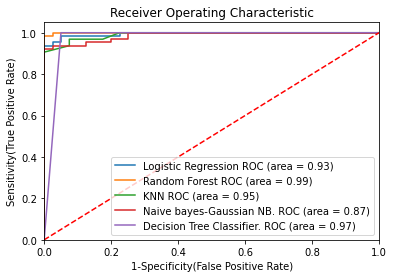

In [121]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# models to the list to be viewed on the ROC plot
models = [
    {
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
    },

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
    },
    
    {
    'label': 'KNN',
    'model': KNeighborsClassifier(n_neighbors=7),
    },
    
    {
    'label': 'Naive bayes-Gaussian NB.',
    'model':  GaussianNB(),
    },
    
    {
    'label': 'Decision Tree Classifier.',
    'model':  DecisionTreeClassifier(),
    },
    
    
    
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()